In [1]:
#Cargar librerias
import tensorflow as tf
import numpy as np
import datetime

import tensorflow_hub as hub

print(tf.__version__)
import time

import matplotlib.pylab as plt
import os
import shutil
import random

2.10.0


# -><- Cambiar Origen de Conjunto de Datos  -><-

In [2]:
# Ruta de la carpeta principal que contiene las subcarpetas de clases
folder_path = "../Data/PetroImages_Augmentedx2" 

# Rutas para los subconjuntos de entrenamiento y validación
train_dir = "../Data/PetroImages_x2ST/train"
validation_dir = "../Data/PetroImages_x2ST/validation"

# -><- Cambiar Directorio del modelo  -><-

In [3]:
modelDirectory = "ResNet_101_x2"

# -><- Cambiar Porcentaje de validación, semilla  -><-

In [4]:
#Preparar dataset
# Proporción de datos para el conjunto de validación (porcentaje)
validation_split = 0.2
random.seed(123)

# Lista de las subcarpetas/clases
class_folders = os.listdir(folder_path)

# Itera a través de cada subcarpeta/clase
for class_folder in class_folders:
    class_path = os.path.join(folder_path, class_folder)
    if os.path.isdir(class_path):
        # Lista de archivos en la subcarpeta actual
        files = os.listdir(class_path)
        # Baraja (shuffle) los archivos de la clase para dividir aleatoriamente
        random.shuffle(files)
        # Calcula la cantidad de datos para el conjunto de validación
        num_validation = int(len(files) * validation_split)
        if num_validation == 0:
            num_validation = 1
        # Divide los archivos en los conjuntos de entrenamiento y validación
        train_files = files[num_validation:]
        validation_files = files[:num_validation]
        

        # Crea las rutas para las carpetas de entrenamiento y validación
        class_train_dir = os.path.join(train_dir, class_folder)
        class_validation_dir = os.path.join(validation_dir, class_folder)

        # Crea las carpetas de entrenamiento y validación si no existen
        os.makedirs(class_train_dir, exist_ok = True)
        os.makedirs(class_validation_dir, exist_ok = True)
        
        # Mueve los archivos a las carpetas correspondientes
        for file in train_files:
            src = os.path.join(class_path, file)
            dst = os.path.join(class_train_dir, file)
            shutil.copy(src, dst)

        for file in validation_files:
            src = os.path.join(class_path, file)
            dst = os.path.join(class_validation_dir, file)
            shutil.copy(src, dst)

# -><- Cambiar Número de lote y dimensión de conjuntos  -><-

In [5]:
#Cargar dataset
#Dividir dataset para entrenamiento y validación  
BATCH_SIZE = 64
IMG_SIZE = (224, 224)

# Crea el conjunto de datos de TensorFlow desde los directorios
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            seed = 123,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 seed = 123,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 13115 files belonging to 106 classes.
Found 3242 files belonging to 106 classes.


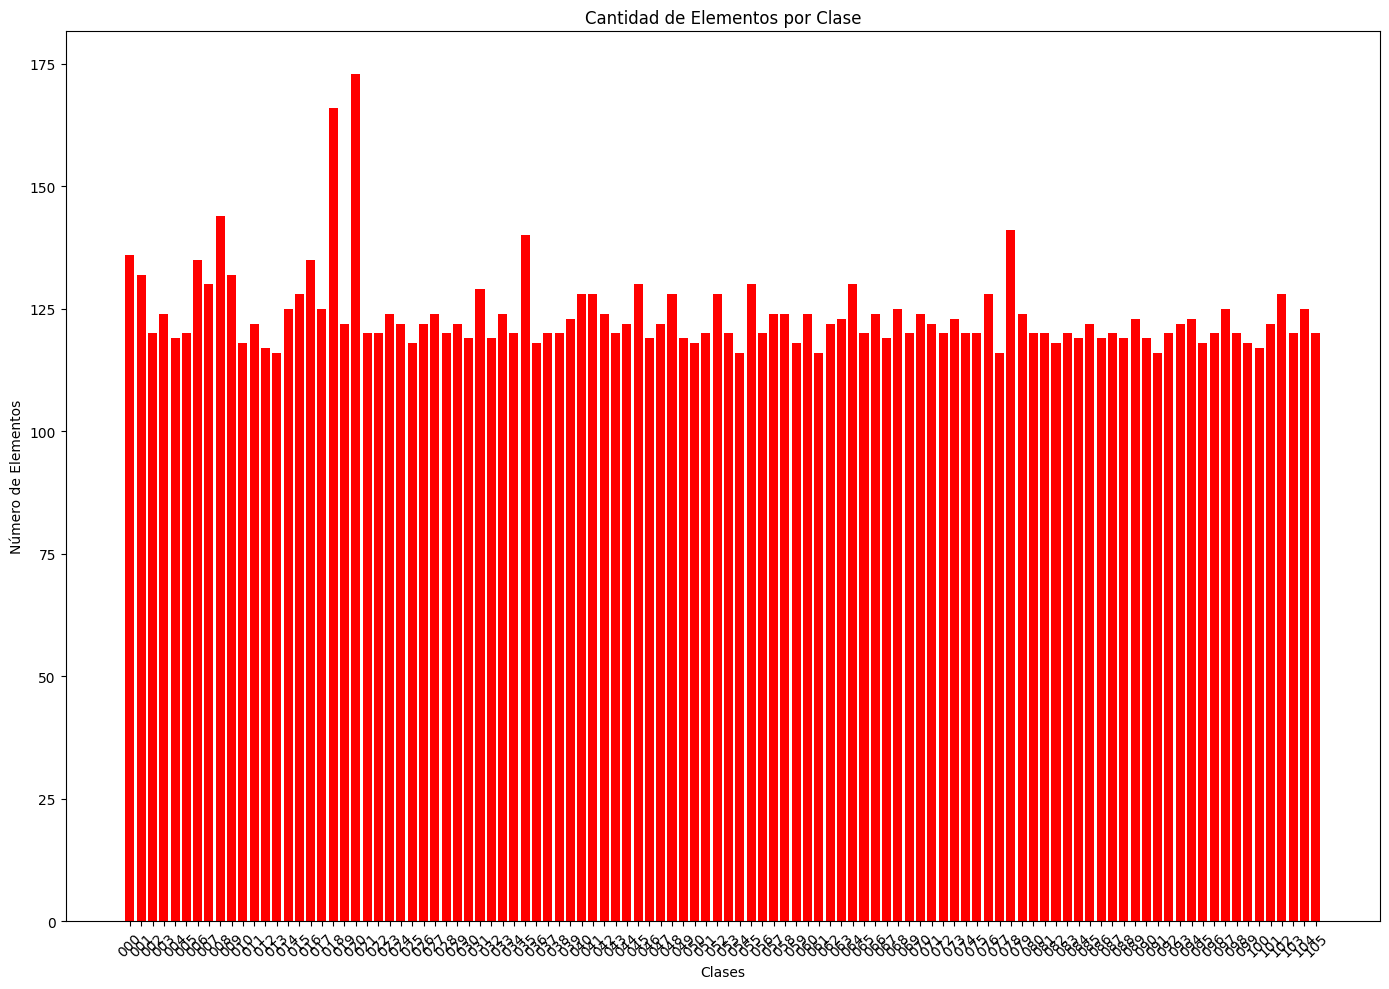

In [6]:
import matplotlib.pyplot as plt

# Lista de nombres de las clases
class_names = np.array(train_ds.class_names)

# Ruta de la carpeta principal
folder_path = train_dir

# Listas para almacenar los nombres de las clases y la cantidad de elementos
class_names_list = []
element_count_list = []

# Itera a través de cada clase
for class_name in class_names:
    class_folder = os.path.join(folder_path, class_name)
    if os.path.exists(class_folder) and os.path.isdir(class_folder):
        # Obtiene la lista de elementos en la carpeta de la clase
        elements = os.listdir(class_folder)
        element_count = len(elements)
        class_names_list.append(class_name)
        element_count_list.append(element_count)

# Crea un gráfico de barras
plt.figure(figsize = (14, 10))
plt.bar(class_names_list, element_count_list, color = 'red')
plt.xlabel('Clases')
plt.ylabel('Número de Elementos')
plt.title('Cantidad de Elementos por Clase')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [7]:
std = np.std(element_count_list)
mean = np.mean(element_count_list)

print('Desviación estándar: ', std)
print('Media: ', mean)

cv = std/mean 
print('Coeficiente de variacion: ', cv)

Desviación estándar:  8.31404020359187
Media:  123.72641509433963
Coeficiente de variacion:  0.06719697000234374


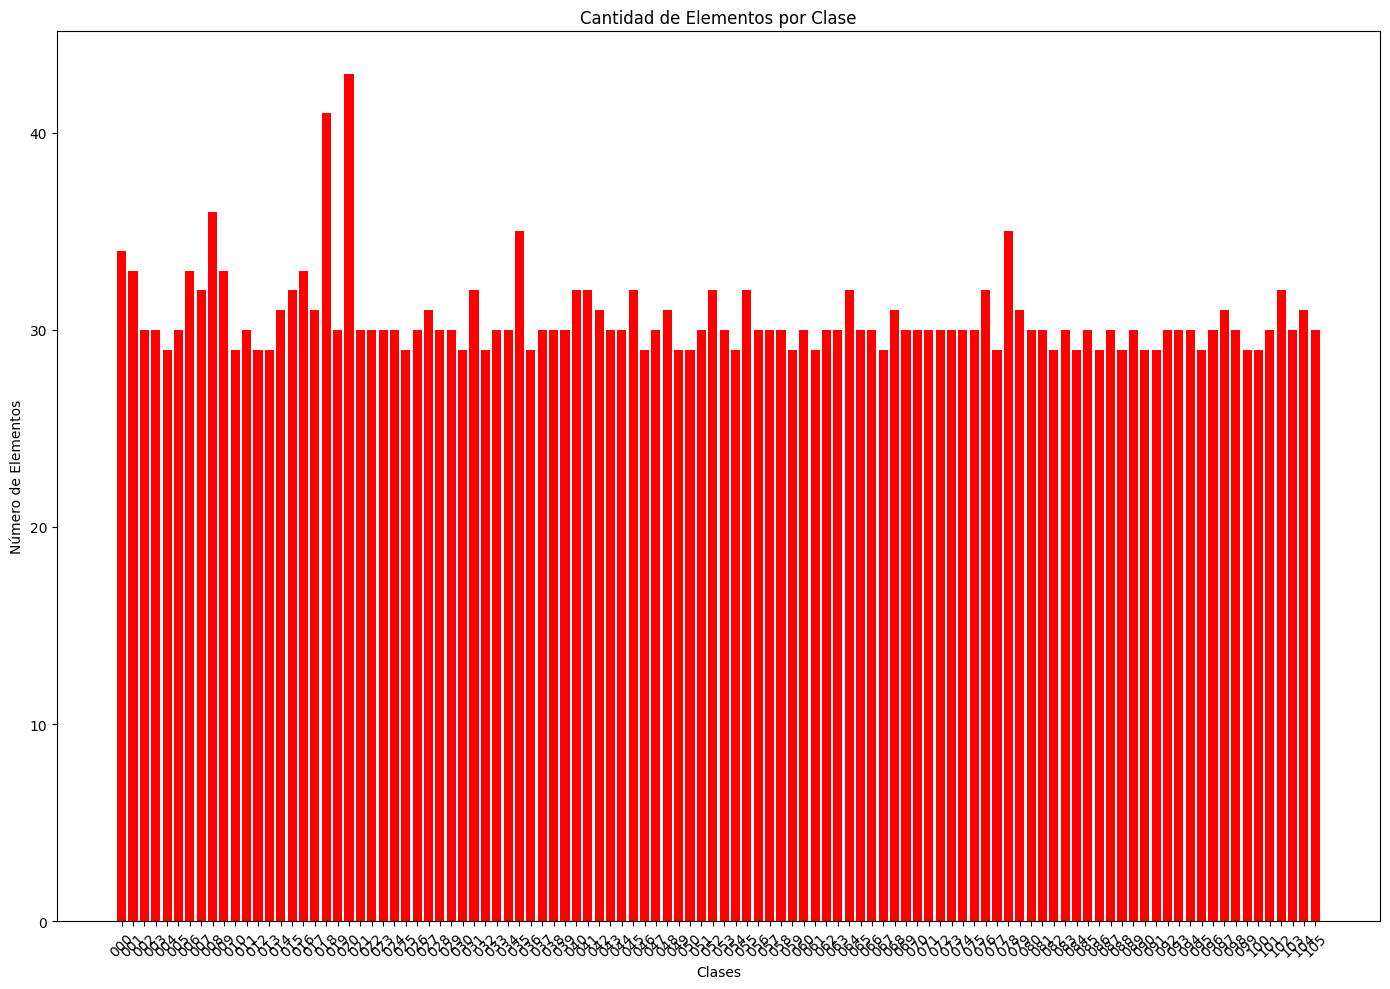

In [8]:
# Lista de nombres de las clases
class_names = np.array(val_ds.class_names)

# Ruta de la carpeta principal
folder_path = validation_dir  # Reemplaza con tu ruta

# Listas para almacenar los nombres de las clases y la cantidad de elementos
class_names_list = []
element_count_list = []

# Itera a través de cada clase
for class_name in class_names:
    class_folder = os.path.join(folder_path, class_name)
    if os.path.exists(class_folder) and os.path.isdir(class_folder):
        # Obtiene la lista de elementos en la carpeta de la clase
        elements = os.listdir(class_folder)
        element_count = len(elements)
        class_names_list.append(class_name)
        element_count_list.append(element_count)

# Crea un gráfico de barras
plt.figure(figsize = (14, 10))
plt.bar(class_names_list, element_count_list, color = 'red')
plt.xlabel('Clases')
plt.ylabel('Número de Elementos')
plt.title('Cantidad de Elementos por Clase')
plt.xticks(rotation = 45)  # Rotar las etiquetas del eje x para mayor claridad

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [9]:
std = np.std(element_count_list)
mean = np.mean(element_count_list)

print('Desviación estándar: ', std)
print('Media: ', mean)

cv = std/mean 
print('Coeficiente de variacion: ', cv)

Desviación estándar:  2.1051057631669967
Media:  30.58490566037736
Coeficiente de variacion:  0.06882825752489255


In [10]:
class_names = np.array(train_ds.class_names)
print(class_names)

['000' '001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011'
 '012' '013' '014' '015' '016' '017' '018' '019' '020' '021' '022' '023'
 '024' '025' '026' '027' '028' '029' '030' '031' '032' '033' '034' '035'
 '036' '037' '038' '039' '040' '041' '042' '043' '044' '045' '046' '047'
 '048' '049' '050' '051' '052' '053' '054' '055' '056' '057' '058' '059'
 '060' '061' '062' '063' '064' '065' '066' '067' '068' '069' '070' '071'
 '072' '073' '074' '075' '076' '077' '078' '079' '080' '081' '082' '083'
 '084' '085' '086' '087' '088' '089' '090' '091' '092' '093' '094' '095'
 '096' '097' '098' '099' '100' '101' '102' '103' '104' '105']


In [11]:
#Normalizar los datos de entrada en conjuntoS de datos de: entrenamiento (train_ds) y validación (val_ds)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

In [12]:
#Mejorar rendimiento 
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [13]:
#Imprimir las formas de los lotes de imágenes y etiquetas
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 224, 224, 3)
(64,)


In [14]:
from tensorflow import keras

# -><- Cambiar Modelo  -><-

In [15]:
#Cargar modelo de extracción de características
resNet101 = "https://www.kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/101-feature-vector/versions/2"
feature_extractor_model = resNet101

# -><- Cambiar Dimensionalidad de entrada  -><-

In [16]:
#Crear una capa Keras (una capa de extracción de características)
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape = (224, 224, 3),
    trainable = False)

In [17]:
#Definir un modelo de aprendizaje automáticode de dos partes principales: un extractor de características 
#y una capa de clasificación.num_classes = len(class_names)
num_classes = len(class_names)
model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              42626560  
                                                                 
 dense (Dense)               (None, 106)               217194    
                                                                 
Total params: 42,843,754
Trainable params: 217,194
Non-trainable params: 42,626,560
_________________________________________________________________


# -><- Cambiar directorio de logs  -><-

In [18]:
#Compilar el modelo
#configuración de entrenamiento, la función de pérdida, el optimizador y las métricas de evaluación del modelo.
#Configurar un registro de TensorBoard para el seguimiento del entrenamiento. 

model.compile(
  optimizer = tf.keras.optimizers.Adam(),
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
  metrics = ['acc'])

log_dir = "Logs/" + modelDirectory + "/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1) # Enable histogram computation for every epoch.

# -><- Cambiar Épocas de entrenamiento  -><-

In [19]:
#Definir epocas del entrenamineto
num_epochs = 35

In [20]:
#Entrenar el modelo utilizando los conjuntos de datos de entrenamiento y validación.
#Registro de TensorBoard para el seguimiento del progreso del entrenamiento.
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = num_epochs,
                    callbacks = tensorboard_callback)

Epoch 1/35
205/205 [==============================] - 393s 2s/step - loss: 2.4923 - acc: 0.4198 - val_loss: 1.6041 - val_acc: 0.5907
Epoch 2/35
205/205 [==============================] - 365s 2s/step - loss: 1.1706 - acc: 0.7163 - val_loss: 1.1848 - val_acc: 0.6949
Epoch 3/35
205/205 [==============================] - 360s 2s/step - loss: 0.7909 - acc: 0.8213 - val_loss: 0.9784 - val_acc: 0.7495
Epoch 4/35
205/205 [==============================] - 366s 2s/step - loss: 0.5809 - acc: 0.8795 - val_loss: 0.8509 - val_acc: 0.7835
Epoch 5/35
205/205 [==============================] - 365s 2s/step - loss: 0.4461 - acc: 0.9173 - val_loss: 0.7633 - val_acc: 0.8044
Epoch 6/35
205/205 [==============================] - 366s 2s/step - loss: 0.3524 - acc: 0.9440 - val_loss: 0.7003 - val_acc: 0.8174
Epoch 7/35
205/205 [==============================] - 367s 2s/step - loss: 0.2840 - acc: 0.9604 - val_loss: 0.6534 - val_acc: 0.8276
Epoch 8/35
205/205 [==============================] - 360s 2s/step - 

In [21]:
#Cargar iblioteca de graficos
import matplotlib.pyplot as plt
import time

In [1]:
#Cargar y recargar la extensión de TensorBoard
%load_ext tensorboard
%reload_ext tensorboard

# -><- Cambiar Directorio de logs  -><-

In [3]:
#iniciar TensorBoard y especificar la ubicación de los registros de entrenamiento y puerto.
%tensorboard --logdir Logs/ResNet_101_x2/fit --port=6007 #--host localhost
#%tensorboard --logdir {logs_base_dir}  --host localhost

In [24]:
#Realizar predicciones en el conjunto de datos de validación utilizando el modelo entrenado previamente.

In [25]:
predicted_val = model.predict(val_ds)
predicted_id = tf.math.argmax(predicted_val, axis =- 1)
predicted_label = class_names[predicted_id]
print(len(predicted_label))
print(predicted_label)

51/51 [==============================] - 72s 1s/step
3242
['105' '053' '050' ... '023' '020' '082']


In [26]:
#Visualizar imágenes del conjunto de datos de validación junto con sus etiquetas reales y las etiquetas predichas por el modelo.

In [27]:
# Inicializa una variable para contar las imágenes
num_images = 0

# Itera a través del conjunto de datos y cuenta las imágenes
for batch in val_ds:
    num_images += batch[0].shape[0]

print("Número de imágenes en el conjunto de datos:", num_images)

Número de imágenes en el conjunto de datos: 3242


# -><- Cambiar Filas y columnas  -><-

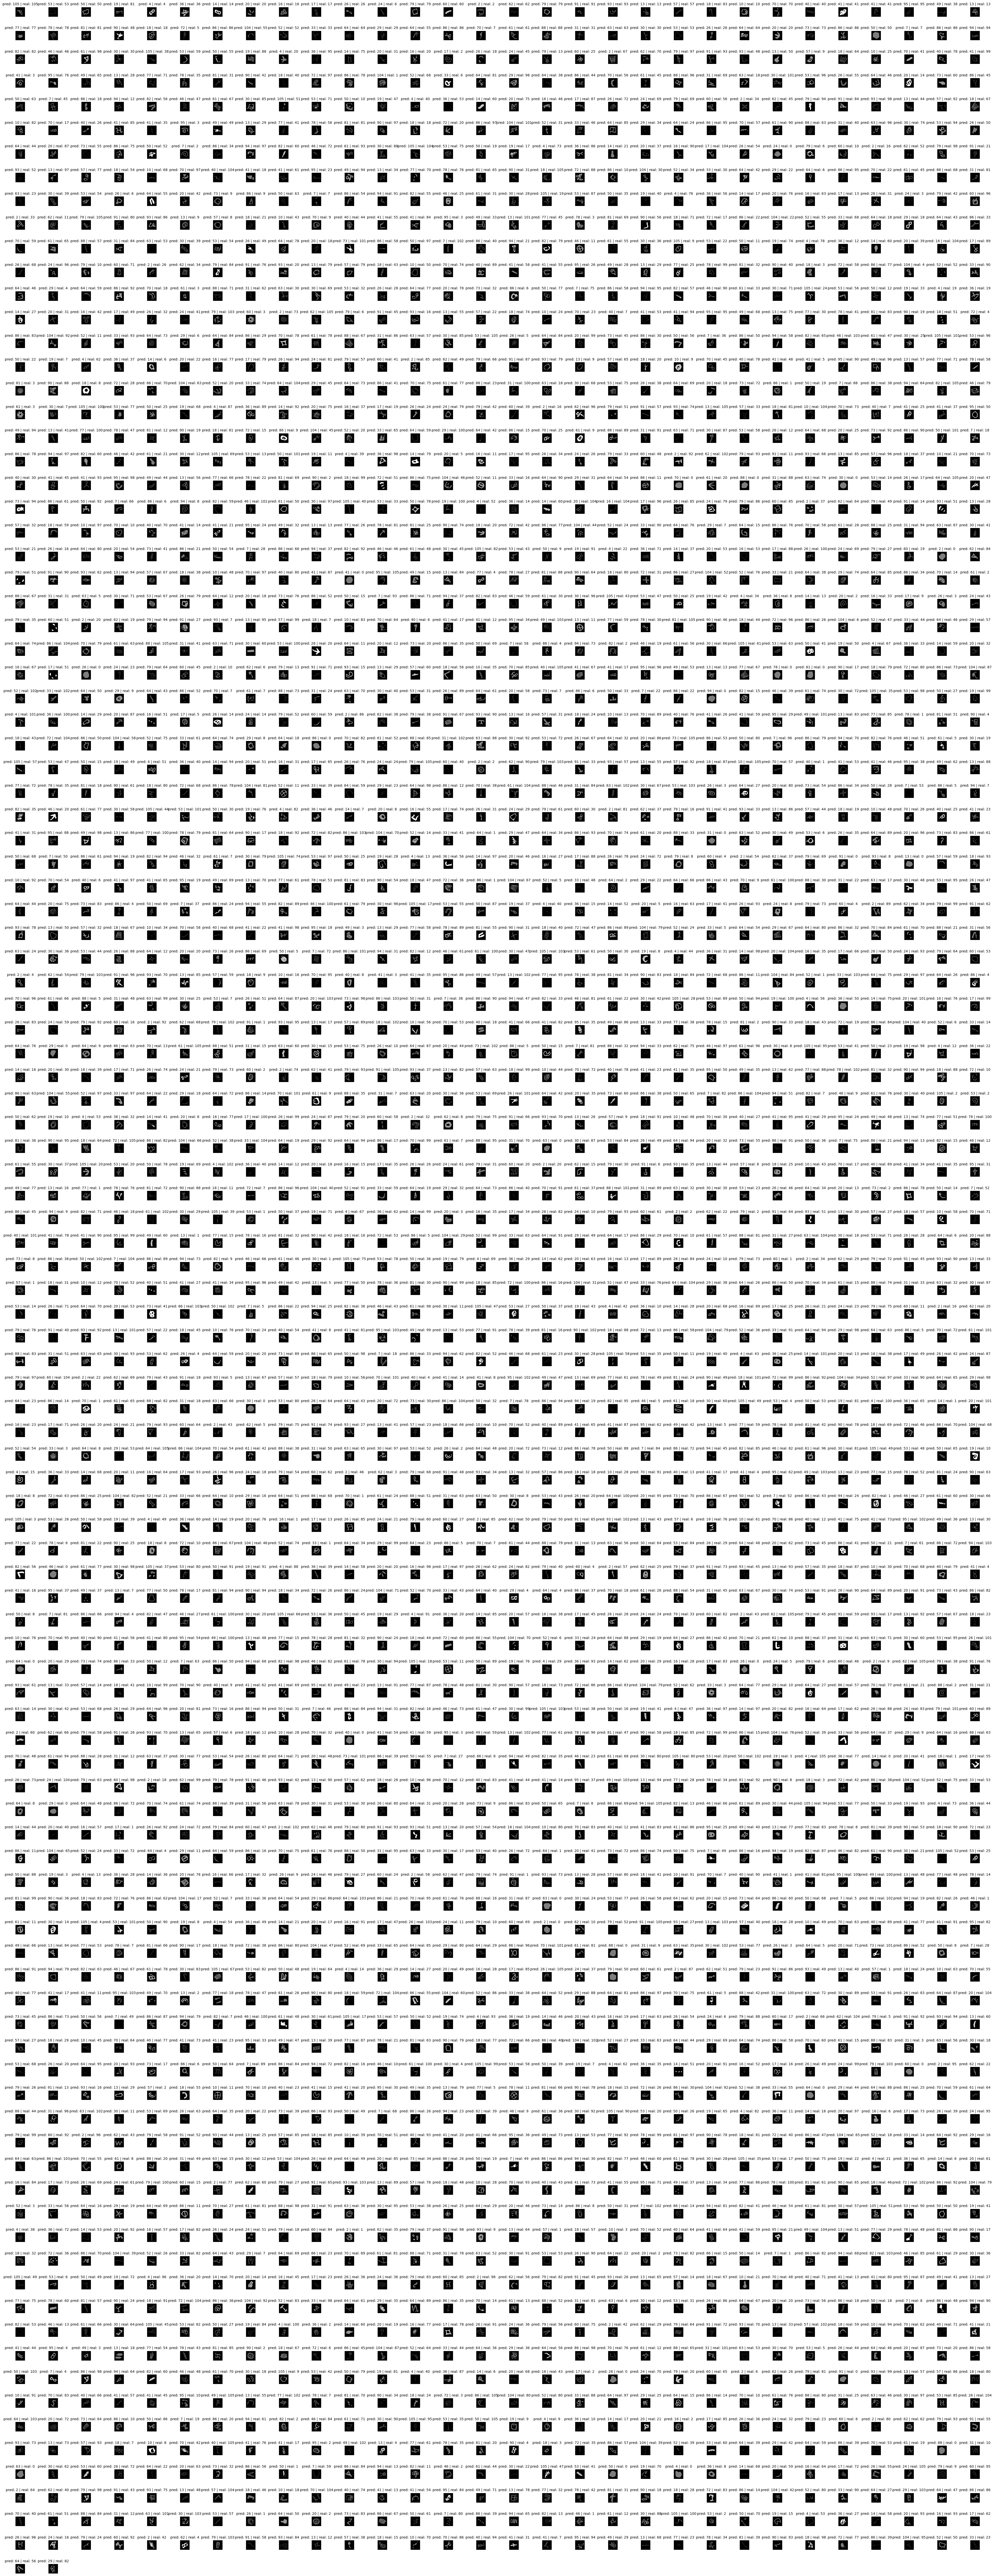

In [28]:
#Visualizar imágenes del conjunto de datos de validación junto con sus etiquetas reales y las etiquetas predichas por el modelo.
plt.figure(figsize=(50, 200))
plt.subplots_adjust(hspace = 1.5)
plt.subplots_adjust(wspace = 1.5)
batch_number = 0
real_labels = np.empty(shape = num_images, dtype = np.int8)
for image_batch, labels_batch in val_ds:
    for i in range(labels_batch.shape[0]):
        ax = plt.subplot(163, 30, i + 1 + batch_number)
        plt.imshow(image_batch[i])
        plt.title("pred: " + str(int(predicted_label[i])) + " | real: " + str(labels_batch[i].numpy()), fontsize=10)
        real_labels[batch_number + i] = int(labels_batch[i].numpy())
        plt.axis("off")
    batch_number = batch_number + BATCH_SIZE

In [29]:
#Almacenar las etiquetas predichas por el modelo como enteros.
predicted_label_cm = np.empty(shape = num_images, dtype = np.int8)
for i in range(len(predicted_label_cm)):
    predicted_label_cm[i] = int(predicted_label[i])
print(predicted_label_cm)

[105  53  50 ...  23  20  82]


In [30]:
print(real_labels)

[105  53  50 ...  23  56  82]


In [31]:
#Matriz de confusión utilizando las etiquetas reales y las etiquetas predichas por tu modelo.

In [32]:
print(real_labels.size)
print(predicted_label_cm.size)


3242
3242


In [33]:
cm = tf.math.confusion_matrix(
    real_labels,
    predicted_label_cm
)

print(cm.numpy())

[[34  0  0 ...  0  0  0]
 [ 0 22  2 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  1  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  1]
 [ 0  0  0 ...  0  0 27]]


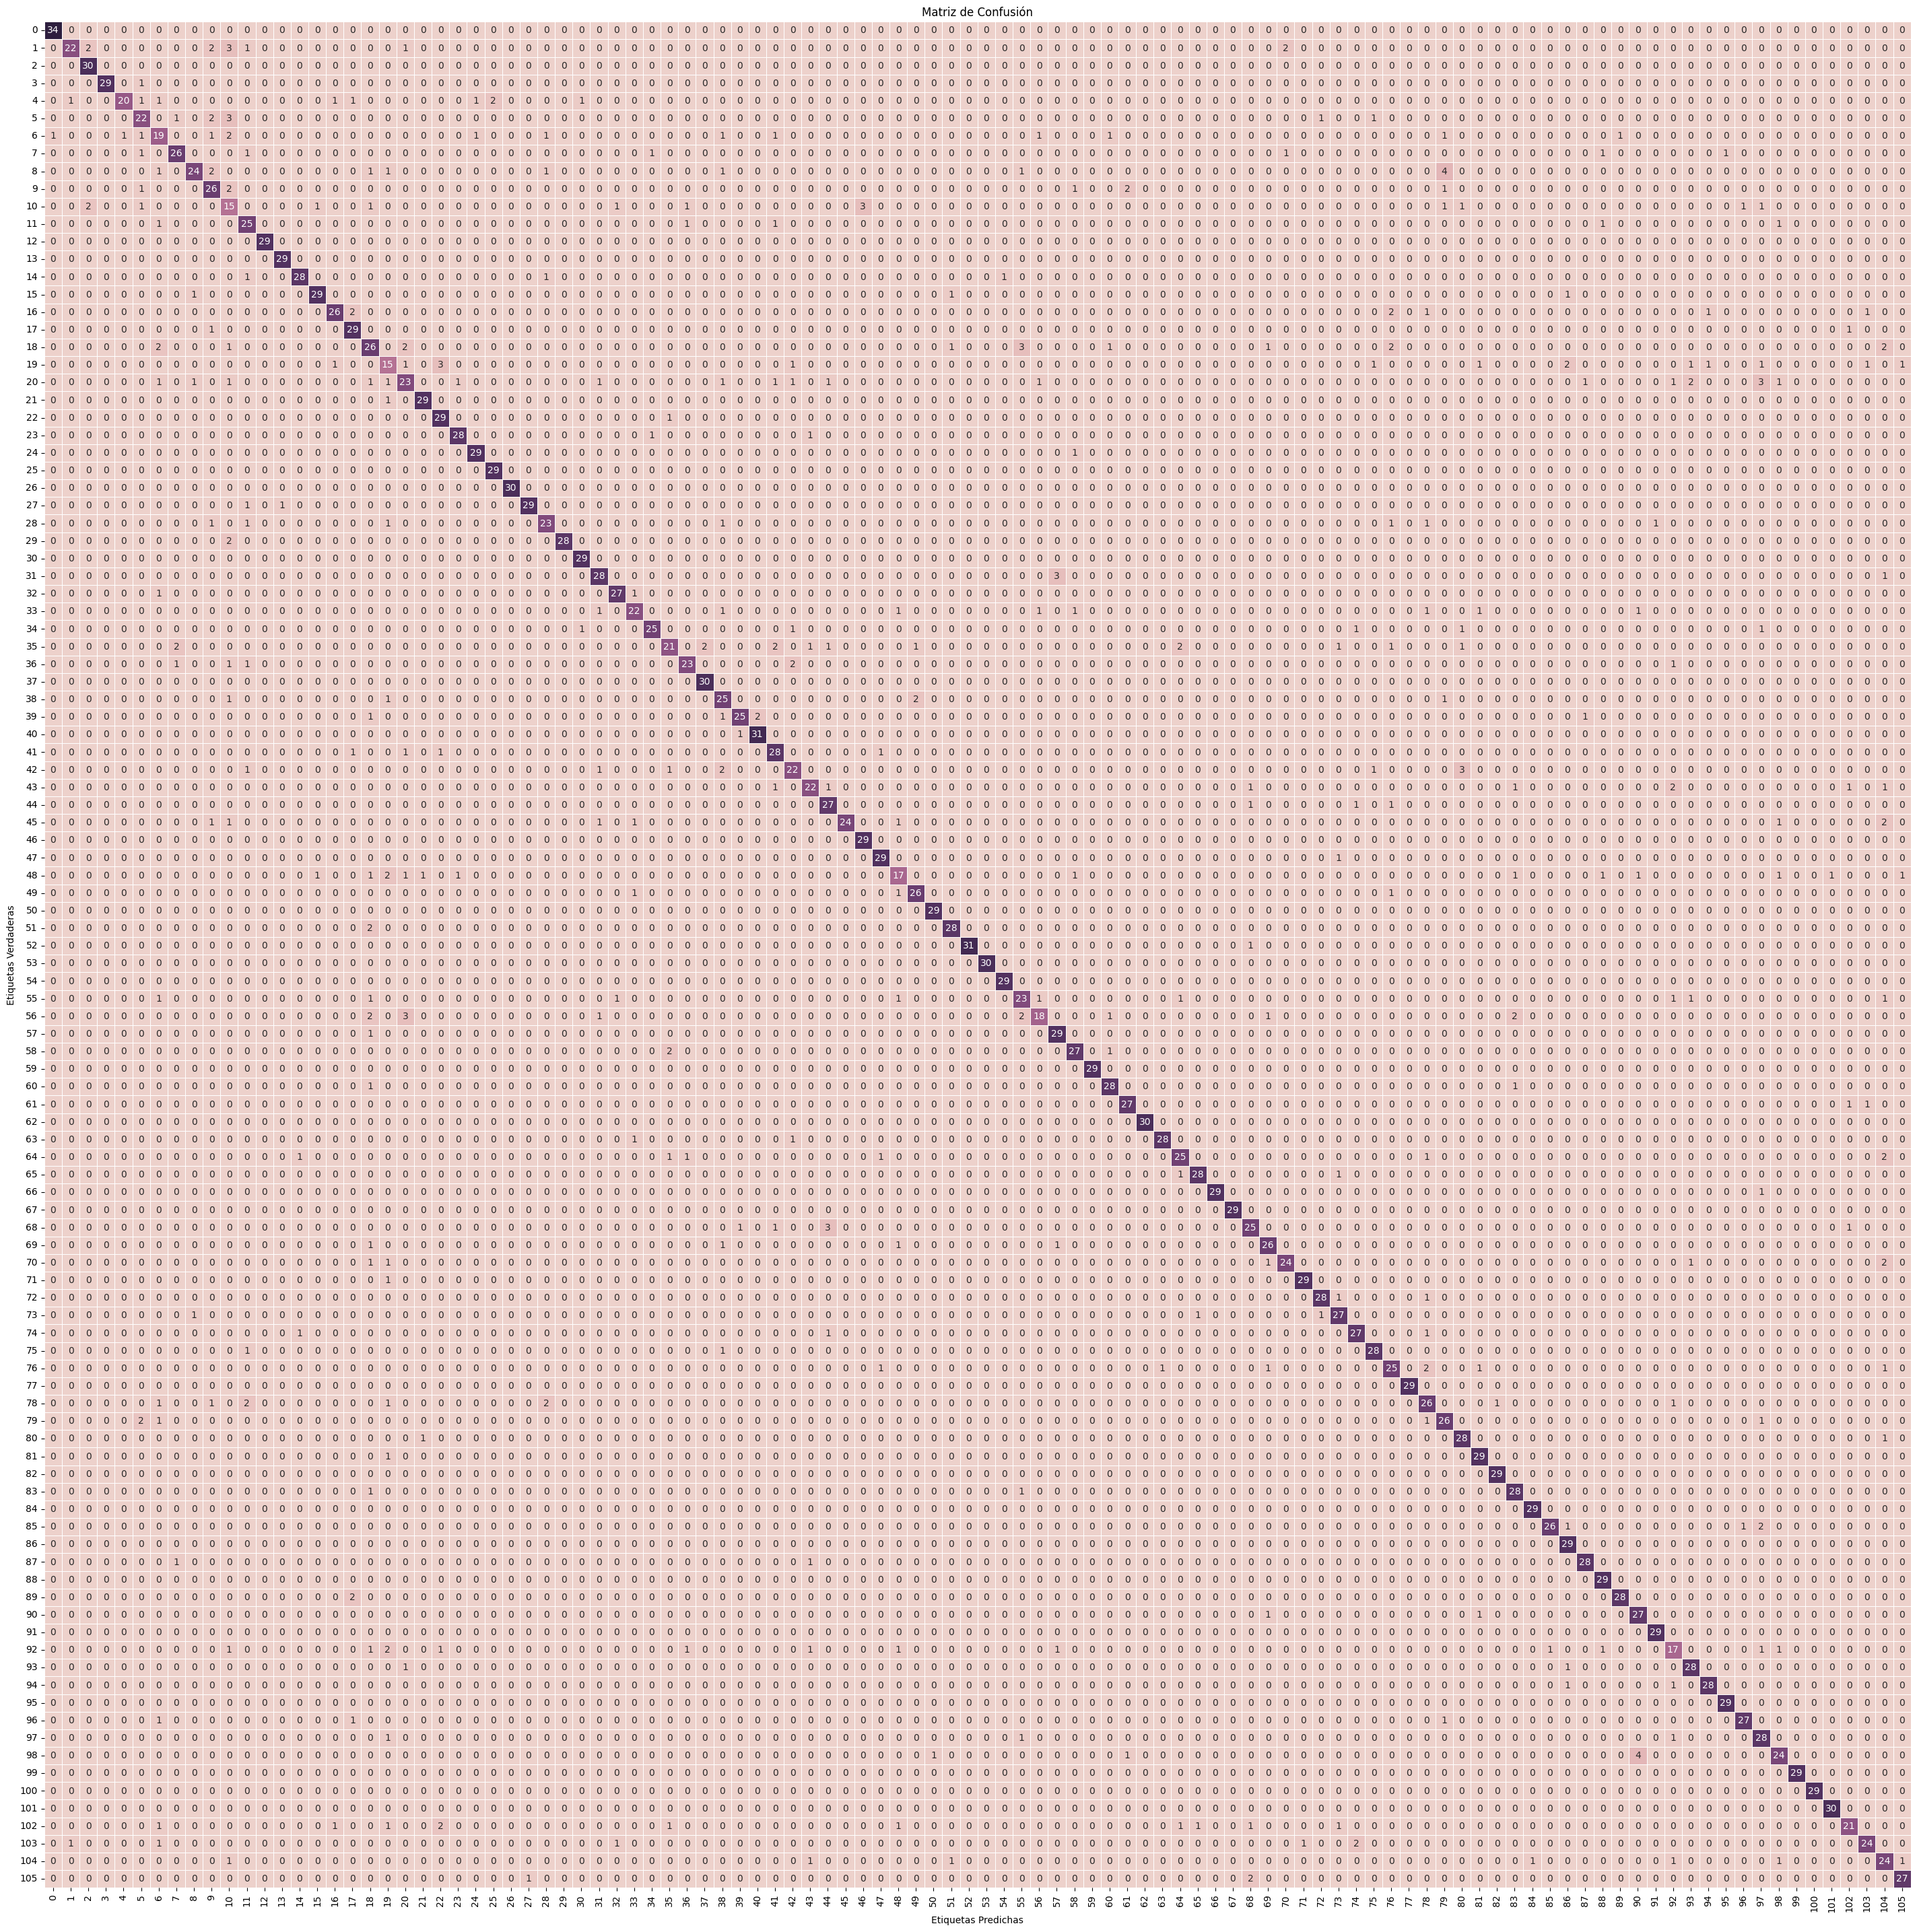

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Supongamos que ya tienes las etiquetas verdaderas y predichas
# test_true_labels y test_predicted_labels

C = confusion_matrix(real_labels, predicted_label_cm)

# Ajusta el tamaño de la figura
plt.figure(figsize = (36, 36))

# Utiliza un mapa de colores personalizado
cmap = sns.cubehelix_palette(as_cmap = True)

# Dibuja la matriz de confusión con anotaciones y un borde
sns.heatmap(cm.numpy(), cmap = cmap, square = True, annot = True, fmt = 'd', linewidths = .5, cbar = False)

# Añade etiquetas de los ejes
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')

# Añade un título
plt.title('Matriz de Confusión')

# Muestra el gráfico
plt.show()

In [35]:
#Metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, balanced_accuracy_score

In [36]:
#Real_labels son las etiquetas reales y predicted_label son las etiquetas predichas por el modelo
accuracy = accuracy_score(real_labels, predicted_label_cm)
mcc = matthews_corrcoef(real_labels, predicted_label_cm)
bal_acc=balanced_accuracy_score(real_labels, predicted_label_cm)

print(f'Accuracy: {accuracy}')
print(f'Balanced_accuracy_score: {bal_acc}')
print(f'Matthews Correlation Coefficient: {mcc}')

Accuracy: 0.8670573719925971
Balanced_accuracy_score: 0.8717136437628035
Matthews Correlation Coefficient: 0.8658406563011248


# -><- Cambiar Directorio para el modelo  -><-

In [37]:
#Guardar el modelo entrenado.
t = time.time()

export_path = "../Models/"+modelDirectory+"/{}".format(int(t))
model.save(export_path)


export_path

INFO:tensorflow:Assets written to: ../Models/ResNet_101_x2/1701302681\assets


INFO:tensorflow:Assets written to: ../Models/ResNet_101_x2/1701302681\assets


'../Models/ResNet_101_x2/1701302681'

In [38]:
#Cargar un modelo previamente guardado
reloaded = tf.keras.models.load_model(export_path)

In [39]:
#Realizar predicciones en las mismas imágenes con dos modelos; el modelo original, el modelo cargado.

In [40]:
result_batch = model.predict(image_batch)
reloaded_result_batch = reloaded.predict(image_batch)

2/2 [==============================] - 2s 314ms/step


In [41]:
#Calcula la máxima diferencia absoluta entre las predicciones realizadas por dos modelos
abs(reloaded_result_batch - result_batch).max()

0.0

In [42]:
reloaded_predicted_id = tf.math.argmax(reloaded_result_batch, axis=-1)
reloaded_predicted_label_batch = class_names[reloaded_predicted_id]
print(reloaded_predicted_label_batch)

['100' '002' '070' '015' '053' '027' '058' '093' '093' '062' '096' '016'
 '024' '092' '035' '004' '074' '058' '084' '012' '038' '015' '070' '086'
 '094' '031' '007' '094' '029' '068' '023' '034' '039' '093' '098' '077'
 '039' '095' '050' '023' '020' '082']


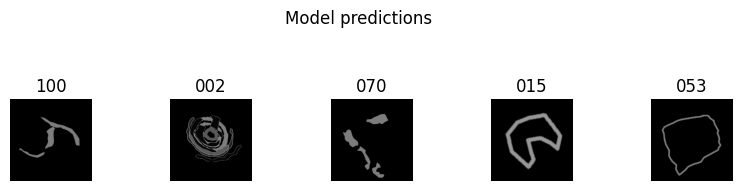

In [43]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(5):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(reloaded_predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")